<a href="https://colab.research.google.com/github/Colley-K/capstone_projects/blob/master/1x_name_filter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1x Name Filter EDA Report 
* This notebook is not the original EDA report, but rather a variation of the full report
* Click [here](https://colab.research.google.com/drive/14AKVsyXy7yJSxBjmEBFyz7kEX7e9ioM_) for the full EDA report

**Purpose**
* The purpose of this notebook is to try out a less aggressive cleaning variation where names that occur 1 time are filtered out
>* In contrast to the original notebook, I filtered out names that occured less than ten times to catch spelling errors
* This notebook will be inherently noisier, but will be great to test out on the suprise library
* We can compare this EDA with the original  to see what this nosier data looks like
>


**In this notebook, I will explore:**

* the distribution of ratings
* the number of ratings each user gave on average
* the number of ratings per route




##Cleaning Report

**Note:** This data was previously normalized and cleaned in the data cleaning report which you can view [here](https://colab.research.google.com/drive/19sAidEVHV7NeCkX10v1qDKPV8SXDqd5M)

##The Initial Set Up:

In [1]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area
!ls "/content/drive/My Drive" #shows whats in your drive once its mounted

#access the OS system to work with current directories:
import os 
os.getcwd() 

Sat May 25 20:08:06 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

'/content'

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import hashlib
import base64


#reconfigure default settings
sns.set_palette(sns.color_palette("hls", 8))
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

##Importing CSV

In [3]:
#Turn the CSV files into data frames

ascent_1x = pd.read_csv('drive/My Drive/Capstone/data/ascent_1x.csv', low_memory=False) 

#view the table
ascent_1x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733355 entries, 0 to 1733354
Data columns (total 4 columns):
Unnamed: 0    int64
user_id       int64
name_id       object
rating        int64
dtypes: int64(3), object(1)
memory usage: 52.9+ MB


In [4]:
ascent_1x.head()

,Unnamed: 0,user_id,name_id,rating
0,98,1,b'ZSMH44nTRn2bAJxdN+ax/iskxCg=',3
1,99,1,b'fPrwO1eaOn1pit2sxBtnmpsLtBY=',1
2,111,1,b'8XEnyhQrs5p40c0RzDSJse4v2wU=',2
3,123,2,b'yeRHlWOfCwHC184C6h74MDjg1HY=',2
4,127,1,b'SkDqB7cHDX3ooiY0TBYqH6Shfjg=',3


#Ratings Distribution

In order for this recomendation system to be successful, there needs to be a good distribution of ratings. The distribution of ratings below looks sufficient for a recommendaiton system:



*   49% of the rock climbing routes are given the highest rating ("3")
*   36.5% are given the intermediate rating ("2")
* 14% of rock climbing routes are given the lowest rating ("1")


Even though the lowest rating is a smaller proportion than the highest rating, this is normal that a negative response will be in the minority.




In [5]:
ascent_1x.rating.value_counts()

3    804885
2    649775
1    278695
Name: rating, dtype: int64

In [6]:
#seeing the distribution of ratings
ascent_1x.rating.describe()

count    1.733355e+06
mean     2.303567e+00
std      7.300559e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: rating, dtype: float64

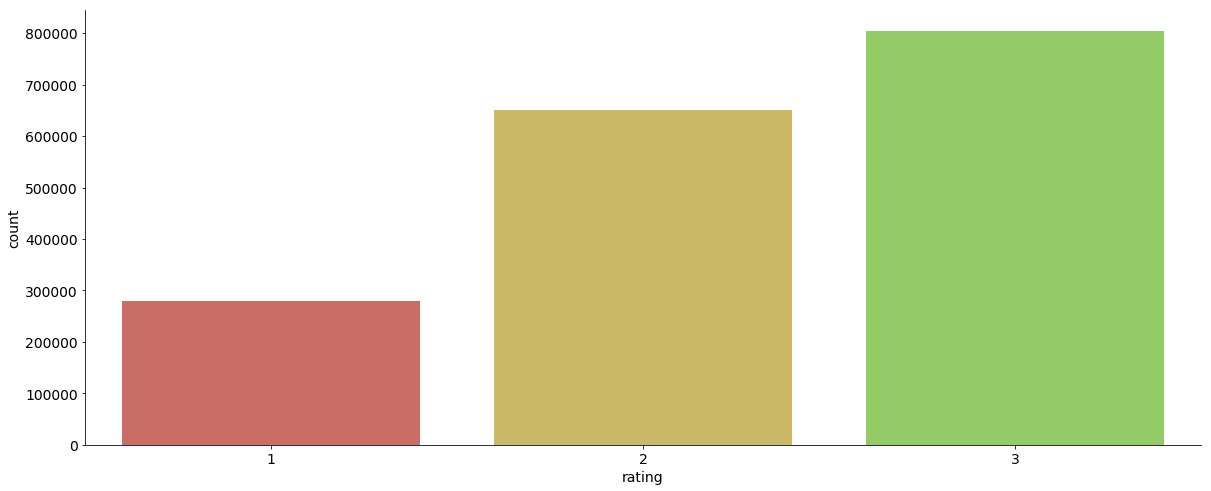

In [7]:
#graphing the distribution of values
sns.countplot(x ="rating", data= ascent_1x)

#Distribution of Ratings given to each Route 

In order for this recomendation system to be successful, there needs to be a good distribution of ratings given to every route. 

### Findings:
* The most ratings a single route recieved was 695 ratings
* The average number of ratings per route was 9.5
* The mode was 2 ratings per route with a total of 57, 622routes with exactly two ratings
* Only 364 routes have more than 200 ratings (thus this was excluded from the graph)

*This is a good distrbution of ratings, and will be sufficient for the model*

In [19]:
#Looking at the distribution

data = ascent_1x.groupby('name_id')[['rating']].count() #grouping the route names by the number of ratings they recieved
data.sort_values("rating", ascending= False)[:50] #sorting the values of those ratings from greatest to least
data.rating.mode() #seeing the most frequent number of ratings (10 is the most frequent number of ratings per route with 3622 routes with exactly 10 ratings)
data[data.rating > 200].count() #seeing how many routes have more than a 200 ratings (353 routes have more than 200 ratings)
#data.rating.describe()






rating    364
dtype: int64

In [9]:
#Top ten most frequntly rated routes
data.sort_values("rating", ascending= False)[:10]

,rating
name_id,
b'Fy8k/SqQP8Bke2HXES7huYFHAr4=',695
b'+Vc6WW3pC5m88H+ocLzgfzupeO4=',668
b'v4+Xeaa10qt0ssi49Ij49xrcXsg=',650
b'DNUtvuOH5J/hMMkL2fALr+8TSBQ=',641
b'ZiFUxJB5pnxSYvjdhje1/3vm/j4=',633
b'j/2bNUNJX+sO1ZWO7zTMgZCuh2c=',627
b'IrglTpSHmU+DjiZcDl7yX6tQFxY=',625
b'ydgskao8bMkP5aXPNNWfydZdFf4=',620
b'aXx9ZscQh5cvuEjlwVwhDRWMcv8=',579


Text(0, 0.5, 'Number of Routes with that Rating')

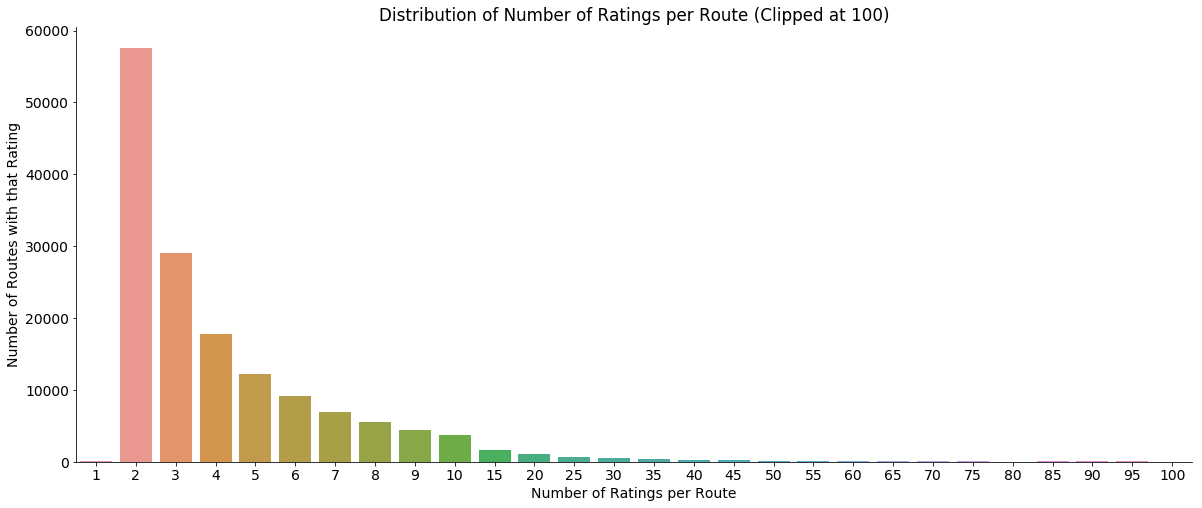

In [21]:
#plotting
route_rating= sns.countplot("rating", data= data, order = [1, 2, 3, 4, 5,6, 7, 8, 9, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]) #with order
plt.title("Distribution of Number of Ratings per Route (Clipped at 100)")
plt.xlabel("Number of Ratings per Route")
plt.ylabel("Number of Routes with that Rating")


#Distribution of Ratings Provided by each User 

Next, I will explore the frequency of ratings each user provided.

### Findings:
* The most ratings a single user provided was 3,674 ratings
* The majority of users (mode) only provided 1 rating 
* The average number of ratings per user is 67
* 550 users gave more than 500 ratings 

In [25]:
#Looking at the distribution

user = ascent_1x.groupby('user_id')[['rating']].count() #grouping the route names by the number of ratings they recieved
user.sort_values("rating", ascending= False)[:50] #sorting the values of those ratings from greatest to least
user.rating.mode() #seeing the most frequent number of ratings (1 is the most frequent number of ratings per user with 2923 users giving only 1 rating)
user[user.rating > 500].count() #seeing how many users gave more than a 500 ratings (550 users have more than 500 ratings)
user.rating.describe()



count    25801.000000
mean        67.181698
std        147.680494
min          1.000000
25%          4.000000
50%         15.000000
75%         61.000000
max       3674.000000
Name: rating, dtype: float64

In [12]:
#Top 10 highest number of ratings per individual user
user.sort_values("rating", ascending= False)[:10]

,rating
user_id,
7505,3674
5512,2986
13622,2862
4121,2786
7235,2503
26155,2478
18195,2219
19137,2186
23956,2091


Text(0, 0.5, 'Count of Users')

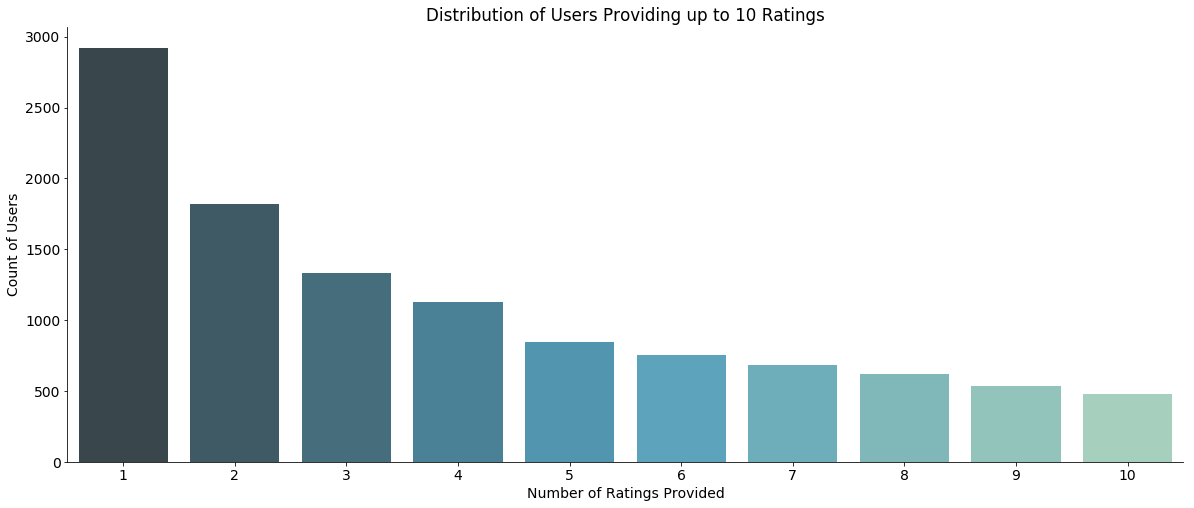

In [13]:
#Close up view of the ratings distribution
user_rating= sns.countplot("rating", data= user, order= [1,2,3,4,5,6,7,8,9,10], palette= "GnBu_d") 
plt.title("Distribution of Users Providing up to 10 Ratings")
plt.xlabel("Number of Ratings Provided")
plt.ylabel("Count of Users")

Text(0, 0.5, 'Count of Users')

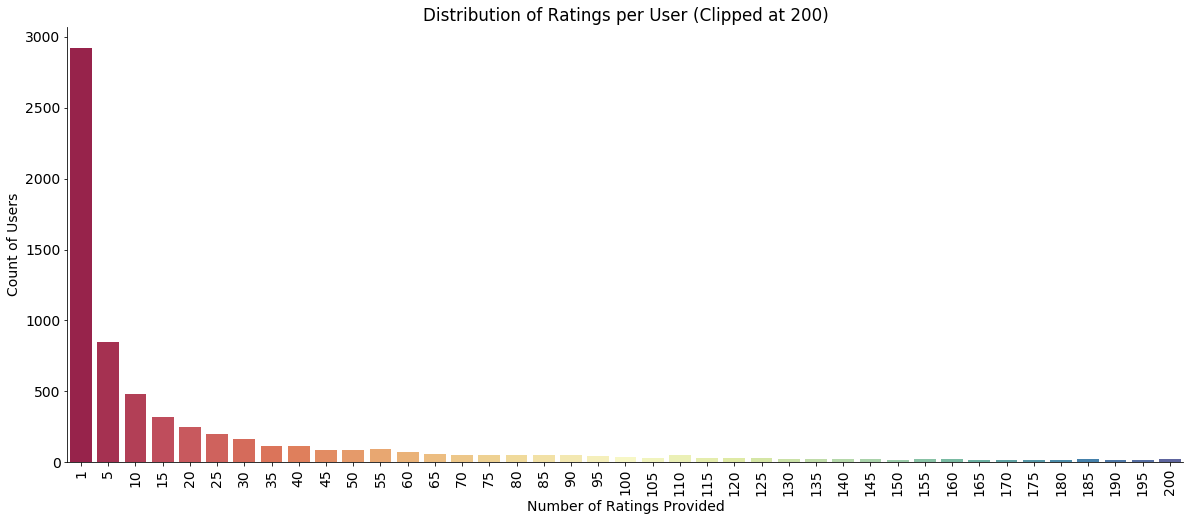

In [26]:
#wider view of the ratings distribution
user_rating= sns.countplot("rating", data= user, palette= ("Spectral"), order= [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]) 
user_rating.tick_params(axis='x', rotation=90)
plt.title("Distribution of Ratings per User (Clipped at 200)")
plt.xlabel("Number of Ratings Provided")
plt.ylabel("Count of Users")

#Next Steps
How many should I filter out???

"I’m sure you have noticed that the above two plots share the same distribution. The number of ratings per book and the number of ratings per user decay exponentially.

To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated movies and rarely rating users."



In [15]:
#suprise library example (she filtered out ALOT!)
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

NameError: ignored